In [1]:
import numpy as np
import pandas as pd

In [2]:
costtimes = pd.read_csv("./results/CostTime.csv")

In [3]:
def polyfitx(y,k=2):
    if isinstance(y,pd.DataFrame):
        x = N[:y.shape[1]].copy()
        x[6] -= 0.000000001
        x[7] += 0.000000001
        y = y.mean(axis=0)
    else:
        x = N[:len(y)].copy()
        x[6] -= 0.000000001
        x[7] += 0.000000001
        y = y
    xnew = np.linspace(np.log10(x.min()),np.log10(x.max()), 50,endpoint=True)  
    spl = np.poly1d(np.polyfit(np.log10(x), np.log10(y),k))
    mooth = np.power(10,spl(xnew))
    xnew = np.power(10,xnew)
    return xnew,mooth

In [4]:
from seaborn import heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'text.usetex':False, 'font.family':'sans-serif','figure.facecolor':"white",'axes.facecolor':"white"})

colors =  ['#1F77B4', '#FF7F0E', '#A7A7A7', '#2CA02C', '#D62728', '#A6D854', '#8DA0CB', '#8C564B', '#834692', '#E78AC3']
custompalette = sns.color_palette(sns.color_palette(np.array(colors),desat=0.8))
sns.set_palette(custompalette)

In [5]:
N = np.array([72,77,96,135,198,222,289,289,379,419,800,882,1000,1005,1015,1023,1083,1138,1484,1600,1612,1651,2000,
  2050,2166,2851,4720,4941,4960,5242,7920,8497,8738,9800,10240,11143,16614,35588,44609,74752,
  114599,143437,317080,334863,1088092,1134890,1379917,1965206,3072441,3997962])

In [6]:
columns = costtimes.columns

<ipython-input-7-1a29454db06a>:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='grey',alpha=0.8)


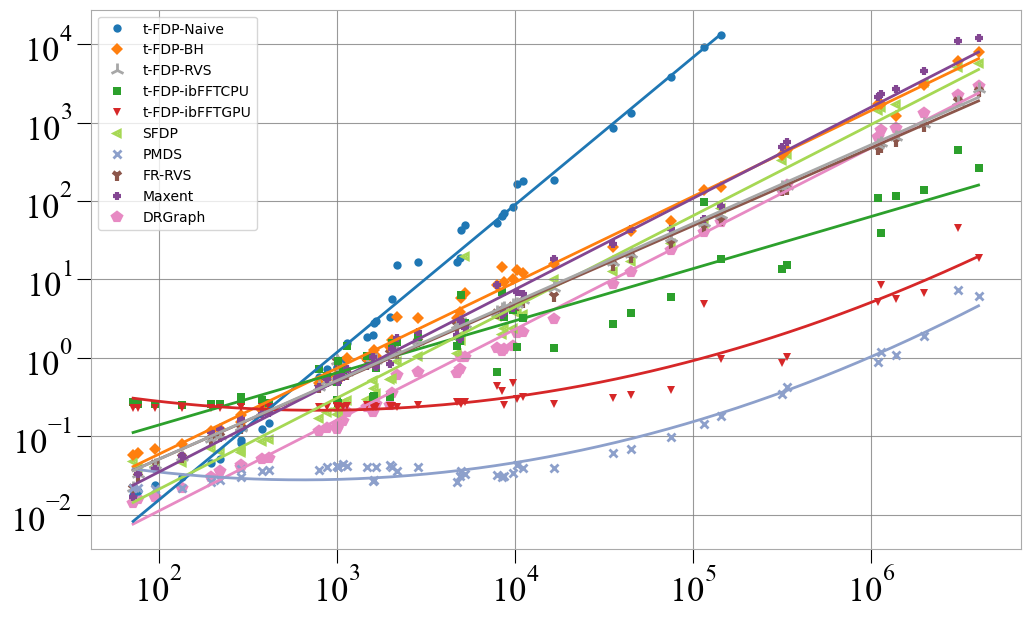

In [7]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)

from scipy.interpolate import make_interp_spline

# mpl.rcParams['text.usetex'] = True

plt.figure(figsize=(12,7))
plt.grid(True)


ax = plt.gca()

ax.axis("on")
# ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.spines["right"].set_visible(True)
ax.spines["top"].set_visible(True)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)

ax.spines["right"].set_color("#AAAAAA")
ax.spines["top"].set_color("#AAAAAA")
ax.spines["bottom"].set_color("#AAAAAA")
ax.spines["left"].set_color("#AAAAAA")

ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(which="major",alpha=0.8)
ax.tick_params(which='major', length=10)
yticks = [0.01,0.1,1.0,10,100,1000,10000]

ax.plot(N, costtimes[columns[0]],zorder=1,marker="o",c=colors[0],lw=0.0,markersize=6,markeredgewidth=0)
ax.plot(N, costtimes[columns[1]],zorder=2,marker="D",c=colors[1],lw=0.0,markersize=6,markeredgewidth=0)
ax.plot(N, costtimes[columns[2]],zorder=2,marker="2",c=colors[2],lw=0.0,markersize=10,markeredgewidth=2)
ax.plot(N, costtimes[columns[3]],zorder=2,marker="s",c=colors[3],lw=0.0,markersize=6,markeredgewidth=0)
ax.plot(N, costtimes[columns[4]],zorder=3,marker="v",c=colors[4],lw=0.0,markersize=6,markeredgewidth=0)

ax.plot(N, costtimes[columns[5]],ls="--",zorder=1,marker="<",c=colors[5],lw=0,markersize=3,markeredgewidth=3)
ax.plot(N, costtimes[columns[6]],ls="--",zorder=3,marker="x",c=colors[6],lw=0,markersize=6,markeredgewidth=2)
ax.plot(N, costtimes[columns[7]],ls="--",zorder=1,marker="1",c=colors[7],lw=0,markersize=8,markeredgewidth=3)
ax.plot(N, costtimes[columns[8]],ls="--",zorder=3,marker="+",c=colors[8],lw=0,markersize=6,markeredgewidth=3)
ax.plot(N, costtimes[columns[9]],ls="--",zorder=0,marker="p",c=colors[9],lw=0,markersize=6,markeredgewidth=3)

ax.plot(polyfitx(costtimes[columns[0]].dropna(),1)[0],polyfitx(costtimes[columns[0]].dropna(),1)[1],zorder=4,c=colors[0],ls="-",lw=2.0)
ax.plot(polyfitx(costtimes[columns[1]],1)[0],polyfitx(costtimes[columns[1]],1)[1],zorder=4,c=colors[1],ls="-",lw=2.0)
ax.plot(polyfitx(costtimes[columns[2]],1)[0],polyfitx(costtimes[columns[2]],1)[1],zorder=5,c=colors[2],ls="-",lw=2.0)
ax.plot(polyfitx(costtimes[columns[3]],1)[0],polyfitx(costtimes[columns[3]],1)[1],zorder=4,c=colors[3],ls="-",lw=2.0)
ax.plot(polyfitx(costtimes[columns[4]],2)[0],polyfitx(costtimes[columns[4]],2)[1],zorder=4,c=colors[4],ls="-",lw=2.0)

ax.plot(polyfitx(costtimes[columns[5]],1)[0],polyfitx(costtimes[columns[5]],1)[1],zorder=4,c=colors[5],ls="-",lw=2.0)
ax.plot(polyfitx(costtimes[columns[6]],2)[0],polyfitx(costtimes[columns[6]],2)[1],zorder=4,c=colors[6],ls="-",lw=2.0)
ax.plot(polyfitx(costtimes[columns[7]],1)[0],polyfitx(costtimes[columns[7]],1)[1],zorder=4,c=colors[7],ls="-",lw=2.0)
ax.plot(polyfitx(costtimes[columns[8]],1)[0],polyfitx(costtimes[columns[8]],1)[1],zorder=4,c=colors[8],ls="-",lw=2.0)
ax.plot(polyfitx(costtimes[columns[9]],1)[0],polyfitx(costtimes[columns[9]],1)[1],zorder=3,c=colors[9],ls="-",lw=2.0)
plt.legend(columns)

ax.set_yticks(yticks)
ax.grid(b=True, which='major', color='grey',alpha=0.8)
ax.yaxis.set_minor_locator(MultipleLocator(1000000))
ax.xaxis.set_minor_locator(MultipleLocator(10000000000))

plt.yticks(fontsize=25,fontname="Times New Roman")
plt.xticks(fontsize=25,fontname="Times New Roman")
plt.savefig("Figs/Fig10TimeComparison.svg")
plt.show()